In [1]:
!pip install dash flask-ngrok

In [2]:
import dash                         # Dash framework
from dash import dcc, html          # For dropdowns and HTML layout
import plotly.express as px         # For easy Plotly visualizations
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load Gapminder dataset (built-in in Plotly)
df = px.data.gapminder()

In [4]:
# Display the first 5 rows of the dataset
df.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


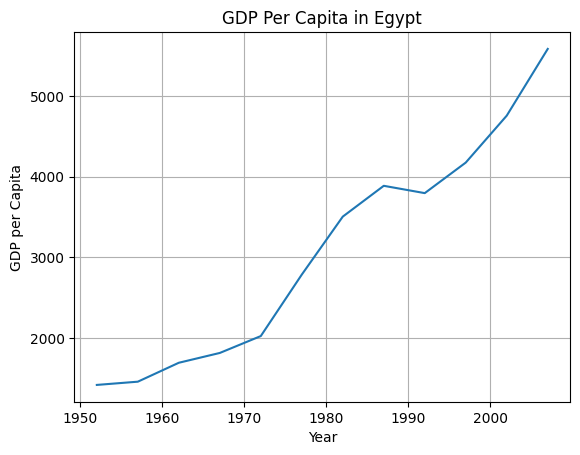

In [5]:
df_egypt = df[df['country'] == 'Egypt']


plt.plot(df_egypt['year'], df_egypt['gdpPercap'])
plt.title("GDP Per Capita in Egypt")
plt.xlabel("Year")
plt.ylabel("GDP per Capita")
plt.grid()
plt.show()


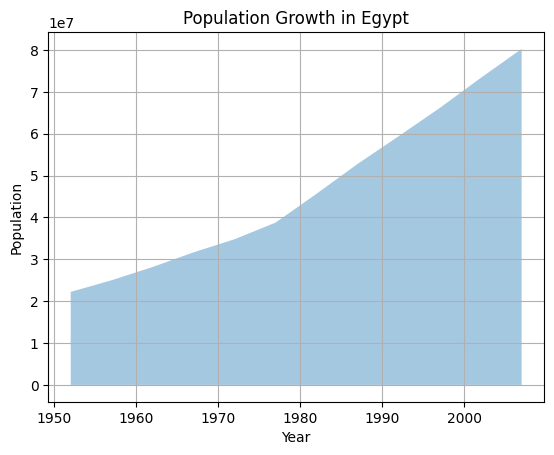

In [6]:
plt.fill_between(df_egypt['year'], df_egypt['pop'], alpha=0.4)
plt.title("Population Growth in Egypt")
plt.xlabel("Year")
plt.ylabel("Population")
plt.grid()
plt.show()


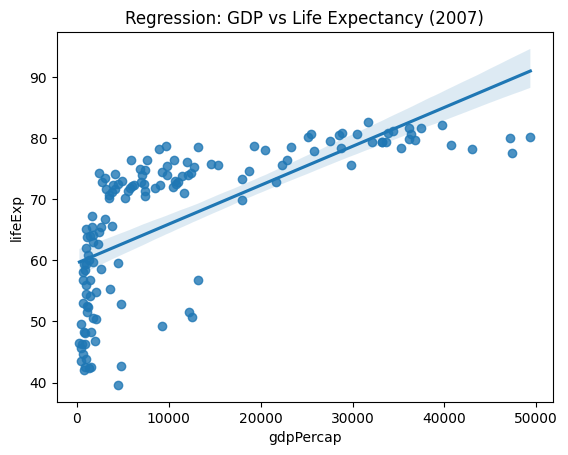

In [7]:
sns.regplot(x='gdpPercap', y='lifeExp', data=df[df['year'] == 2007])
plt.title("Regression: GDP vs Life Expectancy (2007)")
plt.show()

In [8]:
# Create Dash app
app = dash.Dash(__name__)

In [ ]:
# Layout of the app (what appears on the webpage)
app.layout = html.Div([
    html.H1("Gapminder Dashboard"),  # Page title

    # Dropdown menu for selecting a continent
    dcc.Dropdown(
        id="continent-dropdown",
        options=[{"label": c, "value": c} for c in df["continent"].unique()],
        value="Asia"  # Default selection
    ),

    # Graph placeholder – chart will be shown here
    dcc.Graph(id="scatter-plot")
])

# Callback to update the chart when dropdown value changes
@app.callback(
    dash.Output("scatter-plot", "figure"),              # What to update
    [dash.Input("continent-dropdown", "value")]         # What triggers the update
)
def update_chart(continent):
    # Filter data to the selected continent
    filtered_data = df[df["continent"] == continent]

    # Create a bubble chart using Plotly
    fig = px.scatter(
        filtered_data,
        x="gdpPercap",        # GDP per person on X-axis
        y="lifeExp",          # Life expectancy on Y-axis
        size="pop",           # Circle size based on population
        color="country",      # Color for each country
        hover_name="country", # Show name when hovering
        log_x=True,           # Log scale for better view
        size_max=60,          # Limit max bubble size
        animation_frame="year",  # Animate over years
        title=f"Life Expectancy vs GDP in {continent}"  # Dynamic title
    )

    return fig  # Return the updated chart

In [10]:
# Run the app on local server
app.run()